<span style="color: red; font-weight: bold; text-align: center; display: block; margin: auto; font-size: 2em;">La poule qui chante</span>

**Contexte du projet :**

L'entreprise envisage de se lancer à l'international dans le secteur de l'exportation de poulets. Dans ce contexte, une analyse approfondie des groupements de pays ciblés et une étude de marché sont nécessaires pour assurer le succès de cette expansion. L'objectif est de comprendre les opportunités et les défis liés à l'exportation de poulets dans différents pays et régions du monde.

**Objectifs de l'entreprise :**

1. **Analyse des groupements de pays :**
   L'entreprise souhaite obtenir une analyse initiale des groupements de pays qui offrent le meilleur potentiel pour l'exportation de poulets. Cette analyse permettra d'identifier les marchés prioritaires et d'orienter les efforts d'expansion internationale.

2. **Approfondissement de l'étude de marché :**
   Après avoir identifié les groupements de pays ciblés, l'entreprise souhaite approfondir l'étude de marché dans ces régions. Cela implique d'analyser les tendances du marché, la demande des consommateurs, la concurrence, ainsi que les aspects réglementaires et économiques spécifiques à chaque pays.

3. **Livraison des résultats et recommandations :**
   L'entreprise attend une livraison complète du projet, comprenant :
   - Une documentation décrivant le contexte du projet de data analyse, y compris les objectifs et les attentes.
   - Une présentation de la démarche suivie pour réaliser l'analyse, en évitant les détails mathématiques complexes et en vulgarisant les sujets abordés.
   - Les résultats de l'analyse, y compris les insights tirés des méthodes de clustering (classification ascendante hiérarchique et k-means), ainsi que les visualisations associées.
   - Des recommandations basées sur les résultats de l'analyse, afin d'orienter la stratégie d'expansion internationale de l'entreprise dans le secteur de l'exportation de poulets.

En résumé, l'entreprise cherche à exploiter les données de la FAO pour prendre des décisions éclairées concernant son expansion internationale dans le secteur de l'exportation de poulets, en s'appuyant sur une analyse approfondie des groupements de pays et du marché.


**1ère partie résumer de la demande :*
- Nettoyage et l’analyse exploratoire des données.


<span style="color:blue; font-weight:bold; font-size:2em;">I] Importations des librairies et fichiers csv</span>

In [1]:
#Importations des librairies nécessaires
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as s
from scipy.stats import rankdata
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta
import random
from matplotlib.ticker import FuncFormatter
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<span style="color:blue; font-weight:bold; font-size:2em;">II] Vérifications</span>

#### <span style="color: #87CEEB;">a.II) Vérification des fichiers</span>

In [2]:
# Chargez les données depuis le fichier CSV dans un DataFrame
population = pd.read_csv('C:\\Users\\eteiw\\OneDrive\\Bureau\\Population_2000_2018.csv')
dispo_alimentaire = pd.read_csv('C:\\Users\\eteiw\\OneDrive\\Bureau\\DisponibiliteAlimentaire_2017.csv')

# Affichez les premières lignes du DataFrame
display(population.head())
display(dispo_alimentaire.head())


print(population.shape)
print(dispo_alimentaire.shape)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


(4411, 15)
(176600, 14)


In [3]:
# Vérifications de la DataFrame population

# Vérifier les doublons
doublons_population = population[population.duplicated()]
if not doublons_population.empty:
    print("Doublons détectés dans la DataFrame population:")
    print(doublons_population)
else:
    print("Aucun doublon détecté dans la DataFrame population.")

# Vérifier les valeurs NaN
valeurs_nan_population = population[population.isna().any(axis=1)]
if not valeurs_nan_population.empty:
    print("\nValeurs NaN détectées dans la DataFrame population:")
    print(valeurs_nan_population)
else:
    print("Aucune valeur NaN détectée dans la DataFrame population.")

# Vérifier les valeurs égales à 0
valeurs_egales_0_population = population[(population.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]
if not valeurs_egales_0_population.empty:
    print("\nValeurs égales à 0 détectées dans la DataFrame population:")
    print(valeurs_egales_0_population)
else:
    print("Aucune valeur égale à 0 détectée dans la DataFrame population.")

# Vérifier les valeurs inférieures à 0
valeurs_inf_0_population = population[(population.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]
if not valeurs_inf_0_population.empty:
    print("\nValeurs inférieures à 0 détectées dans la DataFrame population:")
    print(valeurs_inf_0_population)
else:
    print("Aucune valeur inférieure à 0 détectée dans la DataFrame population.")

# Afficher des statistiques générales sur le DataFrame
print("\nStatistiques générales sur la DataFrame population:")
print(population.describe())

print("\nTypes de données par colonne dans la DataFrame population:")
print(population.dtypes)

print("\nDimensions de la DataFrame population:")
print(population.shape)


Aucun doublon détecté dans la DataFrame population.

Valeurs NaN détectées dans la DataFrame population:
     Code Domaine                       Domaine  Code zone         Zone  \
0              OA  Séries temporelles annuelles          2  Afghanistan   
1              OA  Séries temporelles annuelles          2  Afghanistan   
2              OA  Séries temporelles annuelles          2  Afghanistan   
3              OA  Séries temporelles annuelles          2  Afghanistan   
4              OA  Séries temporelles annuelles          2  Afghanistan   
...           ...                           ...        ...          ...   
4406           OA  Séries temporelles annuelles        181     Zimbabwe   
4407           OA  Séries temporelles annuelles        181     Zimbabwe   
4408           OA  Séries temporelles annuelles        181     Zimbabwe   
4409           OA  Séries temporelles annuelles        181     Zimbabwe   
4410           OA  Séries temporelles annuelles        181     Zimbabw

C:\Users\eteiw\AppData\Local\Temp\ipykernel_17976\4273201893.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valeurs_egales_0_population = population[(population.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]
C:\Users\eteiw\AppData\Local\Temp\ipykernel_17976\4273201893.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valeurs_inf_0_population = population[(population.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]


In [4]:
# Vérifications de la DataFrame dispo_alimentaire

# Vérifier les doublons
doublons_dispo_alimentaire = dispo_alimentaire[dispo_alimentaire.duplicated()]
if not doublons_dispo_alimentaire.empty:
    print("Doublons détectés dans la DataFrame dispo_alimentaire:")
    print(doublons_dispo_alimentaire)
else:
    print("Aucun doublon détecté dans la DataFrame dispo_alimentaire.")

# Vérifier les valeurs NaN
valeurs_nan_dispo_alimentaire = dispo_alimentaire[dispo_alimentaire.isna().any(axis=1)]
if not valeurs_nan_dispo_alimentaire.empty:
    print("\nValeurs NaN détectées dans la DataFrame dispo_alimentaire:")
    print(valeurs_nan_dispo_alimentaire)
else:
    print("Aucune valeur NaN détectée dans la DataFrame dispo_alimentaire.")

# Vérifier les valeurs égales à 0
valeurs_egales_0_dispo_alimentaire = dispo_alimentaire[(dispo_alimentaire.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]
if not valeurs_egales_0_dispo_alimentaire.empty:
    print("\nValeurs égales à 0 détectées dans la DataFrame dispo_alimentaire:")
    print(valeurs_egales_0_dispo_alimentaire)
else:
    print("Aucune valeur égale à 0 détectée dans la DataFrame dispo_alimentaire.")

# Vérifier les valeurs inférieures à 0
valeurs_inf_0_dispo_alimentaire = dispo_alimentaire[(dispo_alimentaire.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]
if not valeurs_inf_0_dispo_alimentaire.empty:
    print("\nValeurs inférieures à 0 détectées dans la DataFrame dispo_alimentaire:")
    print(valeurs_inf_0_dispo_alimentaire)
else:
    print("Aucune valeur inférieure à 0 détectée dans la DataFrame dispo_alimentaire.")

# Afficher des statistiques générales sur le DataFrame
print("\nStatistiques générales sur la DataFrame dispo_alimentaire:")
print(dispo_alimentaire.describe())

print("\nTypes de données par colonne dans la DataFrame dispo_alimentaire:")
print(dispo_alimentaire.dtypes)

print("\nDimensions de la DataFrame dispo_alimentaire:")
print(dispo_alimentaire.shape)

Aucun doublon détecté dans la DataFrame dispo_alimentaire.
Aucune valeur NaN détectée dans la DataFrame dispo_alimentaire.


C:\Users\eteiw\AppData\Local\Temp\ipykernel_17976\1557849717.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valeurs_egales_0_dispo_alimentaire = dispo_alimentaire[(dispo_alimentaire.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]



Valeurs égales à 0 détectées dans la DataFrame dispo_alimentaire:
       Code Domaine                      Domaine  Code zone         Zone  \
3               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
8               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
16              FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
18              FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
21              FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
...             ...                          ...        ...          ...   
176585          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176587          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176589          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176593          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176594          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   

        Code Élément

C:\Users\eteiw\AppData\Local\Temp\ipykernel_17976\1557849717.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  valeurs_inf_0_dispo_alimentaire = dispo_alimentaire[(dispo_alimentaire.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]



Valeurs inférieures à 0 détectées dans la DataFrame dispo_alimentaire:
       Code Domaine                      Domaine  Code zone         Zone  \
2               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
43              FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
70              FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
110             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
169             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
...             ...                          ...        ...          ...   
176003          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176275          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176356          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176379          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176492          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   

        Code Él

In [5]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [6]:
dispo_alimentaire.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


<span style="color: #FFA500;">Nous avons observé des valeurs nulles et des NaN dans les fichiers de population et de disponibilité alimentaire.</span>

#### <span style="color: #87CEEB;">b.II) Traitement fichier population</span>

In [7]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [8]:
# Renommer la colonne "Valeur" en "pop" dans le DataFrame population
population = population.rename(columns={'Valeur': 'population'})
display(population )

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,population,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


<span style="color: #FFA500;">Nous renommerons la colonne pour une meilleure lisibilité.</span>

In [9]:
# Filtrer les lignes où la colonne "Année" est égale à 2017
population_2017 = population[population['Année'] == 2017]

# Afficher le résultat
display(population_2017)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,population,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,OA,Séries temporelles annuelles,236,Venezuela (République bolivarienne du),511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,29402.484,X,Sources internationales sûres,NaN
4352,OA,Séries temporelles annuelles,237,Viet Nam,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,94600.648,X,Sources internationales sûres,NaN
4371,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
4390,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN


<span style="color: #FFA500;">Nous filtrons la population pour l'année 2017, car le fichier de disponibilité alimentaire ne contient que cette année.</span>

In [10]:
population_2017  = population_2017 .drop(columns=['Code Domaine','Domaine' ,'Produit', 'Code zone', 'Code Élément', 'Code Produit', 'Code année', 'Élément', 'Unité', 'Symbole', 'Description du Symbole','Note'], errors='ignore')
display(population_2017 )

,Zone,Année,population
17,Afghanistan,2017,36296.113
36,Afrique du Sud,2017,57009.756
55,Albanie,2017,2884.169
74,Algérie,2017,41389.189
93,Allemagne,2017,82658.409
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402.484
4352,Viet Nam,2017,94600.648
4371,Yémen,2017,27834.819
4390,Zambie,2017,16853.599


<span style="color: #FFA500;"> Nous supprimons les colonnes qui ne sont pas utiles. </span>

In [11]:

# multiplier la colonne "population" par mille
population_2017 ['population'] = population_2017['population'] * 1000

# vérifier les premières lignes du dataframe pour voir le résultat
print(population_2017 .head())


              Zone  Année  population
17     Afghanistan   2017  36296113.0
36  Afrique du Sud   2017  57009756.0
55         Albanie   2017   2884169.0
74         Algérie   2017  41389189.0
93       Allemagne   2017  82658409.0


In [12]:
print(population_2017.dtypes)


Zone           object
Année           int64
population    float64
dtype: object


In [13]:
# Remplacer les valeurs NaN par 0 (ou une autre valeur par défaut) avant la conversion
population_2017['population'] = population_2017['population'].fillna(0).astype(int)

# Ou, pour gérer les valeurs non numériques, tu pourrais utiliser:
population_2017['population'] = pd.to_numeric(population_2017['population'], errors='coerce').fillna(0).astype(int)

display(population_2017)

,Zone,Année,population
17,Afghanistan,2017,36296113
36,Afrique du Sud,2017,57009756
55,Albanie,2017,2884169
74,Algérie,2017,41389189
93,Allemagne,2017,82658409
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402484
4352,Viet Nam,2017,94600648
4371,Yémen,2017,27834819
4390,Zambie,2017,16853599


<span style="color: #FFA500;"> Pour une meilleure lisibilité et en vue des traitements que nous effectuerons dans la deuxième partie, nous remplaçons les valeurs NaN par 0.</span>

In [14]:
afghanistan_data =population_2017[population_2017 ['Zone'] == 'Afghanistan']
display(afghanistan_data )

,Zone,Année,population
17,Afghanistan,2017,36296113


#### <span style="color: #87CEEB;">c.II) Disponibilité alimentaire</span>

In [15]:
display(dispo_alimentaire)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [16]:
dispo_alimentaire = dispo_alimentaire.drop(columns=['Code Domaine', 'Code zone', 'Code Élément', 'Code Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole','Domaine'], errors='ignore')
display(dispo_alimentaire )

,Zone,Élément,Produit,Année,Valeur
0,Afghanistan,Production,Blé et produits,2017,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2017,2302.00
2,Afghanistan,Variation de stock,Blé et produits,2017,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,6701.00
...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,2017,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,2017,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,2017,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2017,0.04


<span style="color: #FFA500;"> Nous supprimons les colonnes qui ne sont pas utiles. </span>

In [17]:
dispo_alimentaire= dispo_alimentaire.loc[dispo_alimentaire['Année'] == 2017]
display(dispo_alimentaire)

,Zone,Élément,Produit,Année,Valeur
0,Afghanistan,Production,Blé et produits,2017,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,2017,2302.00
2,Afghanistan,Variation de stock,Blé et produits,2017,-119.00
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,0.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,6701.00
...,...,...,...,...,...
176595,Zimbabwe,Nourriture,Miscellanees,2017,19.00
176596,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,2017,1.33
176597,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,2017,1.00
176598,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2017,0.04


In [18]:
dispo_alimentaire = dispo_alimentaire.query("Produit == 'Viande de Volailles'") 
display(dispo_alimentaire)

,Zone,Élément,Produit,Année,Valeur
651,Afghanistan,Production,Viande de Volailles,2017,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,2017,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,57.00
655,Afghanistan,Pertes,Viande de Volailles,2017,2.00
...,...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,2017,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,2017,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,2017,16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,2017,1.59


<span style="color: #FFA500;">Nous créons un filtre sur les produits de volaille pour une meilleure lisibilité. </span>

In [19]:
Éléments = dispo_alimentaire['Élément'].unique()
print(Éléments )

['Production' 'Importations - Quantité' 'Variation de stock'
 'Disponibilité intérieure' 'Pertes' 'Résidus' 'Nourriture'
 'Disponibilité alimentaire en quantité (kg/personne/an)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Exportations - Quantité' 'Alimentation pour touristes' 'Traitement'
 'Autres utilisations (non alimentaire)' 'Aliments pour animaux'
 'Semences']


<span style="color: #FFA500;">Nous vérifions la colonne "éléments" afin de conserver les données les plus intéressantes. </span>

In [20]:
dispo_alimentaire_filtre = dispo_alimentaire.query(" Élément in ['Production','Exportations - Quantité', 'Importations - Quantité','Disponibilité intérieure']") 
display(dispo_alimentaire_filtre)


,Zone,Élément,Produit,Année,Valeur
651,Afghanistan,Production,Viande de Volailles,2017,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,29.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,57.0
1704,Afrique du Sud,Production,Viande de Volailles,2017,1667.0
1705,Afrique du Sud,Importations - Quantité,Viande de Volailles,2017,514.0
...,...,...,...,...,...
175364,Zambie,Exportations - Quantité,Viande de Volailles,2017,1.0
175365,Zambie,Disponibilité intérieure,Viande de Volailles,2017,60.0
176388,Zimbabwe,Production,Viande de Volailles,2017,69.0
176389,Zimbabwe,Importations - Quantité,Viande de Volailles,2017,6.0


<span style="color: #FFA500;">Nous créons un filtre sur les éléments les plus pertinents.</span>

In [21]:
# regrouper les données par "Élément" et "Zone" en fonction de "Valeur"
# en utilisant la somme comme fonction d'agrégation
groupes = dispo_alimentaire_filtre.groupby(['Élément', 'Zone'])['Valeur'].sum()

# afficher le résultat
print(groupes)


Élément                   Zone                 
Disponibilité intérieure  Afghanistan                 57.0
                          Afrique du Sud            2118.0
                          Albanie                     47.0
                          Algérie                    277.0
                          Allemagne                 1739.0
                                                    ...   
Production                Émirats arabes unis         48.0
                          Équateur                   340.0
                          États-Unis d'Amérique    21914.0
                          Éthiopie                    14.0
                          Îles Salomon                 0.0
Name: Valeur, Length: 643, dtype: float64


In [22]:
# Utiliser la méthode pivot_table() pour transformer le dataframe en un dispo_alim avec une colonne par élément et produit
dispo_alim = dispo_alimentaire_filtre.pivot_table(index='Zone', columns=['Élément'], values='Valeur')

# Réinitialiser l'index pour avoir une colonne "Zone"
dispo_alim = dispo_alim.reset_index()

# Afficher le dispo_alim
display(dispo_alim)


Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,57.0,NaN,29.0,28.0
1,Afrique du Sud,2118.0,63.0,514.0,1667.0
2,Albanie,47.0,0.0,38.0,13.0
3,Algérie,277.0,0.0,2.0,275.0
4,Allemagne,1739.0,646.0,842.0,1514.0
...,...,...,...,...,...
165,Émirats arabes unis,412.0,94.0,433.0,48.0
166,Équateur,341.0,0.0,0.0,340.0
167,États-Unis d'Amérique,18266.0,3692.0,123.0,21914.0
168,Éthiopie,14.0,NaN,1.0,14.0


<span style="color: #FFA500;">Pour une meilleure lisibilité, nous procédons à une pivot table pour placer chaque élément dans une colonne et faciliter le traitement des données. </span>

#### <span style="color: #87CEEB;">b.II) Merge</span>

In [23]:
# Fusionner dispo_alim avec population_2017 sur la colonne 'Zone' en utilisant une jointure gauche
dispo_alim = pd.merge(dispo_alim, population_2017, on='Zone', how='left')

# Afficher le résultat
display(dispo_alim)



,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population
0,Afghanistan,57.0,NaN,29.0,28.0,2017,36296113
1,Afrique du Sud,2118.0,63.0,514.0,1667.0,2017,57009756
2,Albanie,47.0,0.0,38.0,13.0,2017,2884169
3,Algérie,277.0,0.0,2.0,275.0,2017,41389189
4,Allemagne,1739.0,646.0,842.0,1514.0,2017,82658409
...,...,...,...,...,...,...,...
165,Émirats arabes unis,412.0,94.0,433.0,48.0,2017,9487203
166,Équateur,341.0,0.0,0.0,340.0,2017,16785361
167,États-Unis d'Amérique,18266.0,3692.0,123.0,21914.0,2017,325084756
168,Éthiopie,14.0,NaN,1.0,14.0,2017,106399924


In [24]:
# Remplacer toutes les valeurs NaN par 0 dans la DataFrame dispo_alim
dispo_alim = dispo_alim.fillna(0)

# Afficher les premières lignes de la DataFrame après remplacement
display(dispo_alim.head())


,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population
0,Afghanistan,57.0,0.0,29.0,28.0,2017,36296113
1,Afrique du Sud,2118.0,63.0,514.0,1667.0,2017,57009756
2,Albanie,47.0,0.0,38.0,13.0,2017,2884169
3,Algérie,277.0,0.0,2.0,275.0,2017,41389189
4,Allemagne,1739.0,646.0,842.0,1514.0,2017,82658409


<span style="color: #FFA500;"> Pour une meilleure lisibilité et en vue des traitements que nous effectuerons dans la deuxième partie, nous remplaçons les valeurs NaN par 0.</span>

In [25]:
# calculer la moyenne de la colonne "population" pour chaque colonne de "Disponibilité intérieure", "Exportations - Quantité", "Importations - Quantité" et "Production" en incluant la colonne "Zone"
moyennes_dispo_alim = dispo_alim.groupby(['Zone', 'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Production'])['population'].mean()
display(moyennes_dispo_alim)

Zone                   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  Production
Afghanistan            57.0                      0.0                      29.0                     28.0           36296113.0
Afrique du Sud         2118.0                    63.0                     514.0                    1667.0         57009756.0
Albanie                47.0                      0.0                      38.0                     13.0            2884169.0
Algérie                277.0                     0.0                      2.0                      275.0          41389189.0
Allemagne              1739.0                    646.0                    842.0                    1514.0         82658409.0
                                                                                                                    ...     
Émirats arabes unis    412.0                     94.0                     433.0                    48.0            9487203.0
Équateur       

<span style="color: #FFA500;">Pour obtenir une vue d'ensemble des valeurs, nous calculons la moyenne.</span>

In [26]:
# filtrer les lignes où la colonne "Population" est inférieure à 100 000 par zone
filtre = dispo_alim['population'] < 100000
dispo_alim_filtre = dispo_alim[filtre]

# vérifier les premières lignes du dataframe filtré pour voir le résultat
print(dispo_alim_filtre)

                     Zone  Disponibilité intérieure  Exportations - Quantité  \
6      Antigua-et-Barbuda                       7.0                      0.0   
44              Dominique                       4.0                      0.0   
131  Saint-Kitts-et-Nevis                       4.0                      0.0   

     Importations - Quantité  Production  Année  population  
6                        7.0         0.0   2017       95426  
44                       4.0         0.0   2017       71458  
131                      4.0         0.0   2017       52045  


<span style="color: #FFA500;">Nous excluons les populations inférieures à 100 000 habitants car elles ont un impact limité et des variables assez faibles. </span>

In [27]:
# créer un filtre booléen pour sélectionner les lignes à supprimer
zones_a_supprimer = ['Antigua-et-Barbuda', 'Dominique', 'Saint-Kitts-et-Nevis']
filtre = dispo_alim['Zone'].isin(zones_a_supprimer)

# supprimer les lignes correspondantes au filtre
dispo_alim = dispo_alim.drop(dispo_alim[filtre].index)

# vérifier les premières lignes du dataframe pour voir le résultat
display(dispo_alim)


,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population
0,Afghanistan,57.0,0.0,29.0,28.0,2017,36296113
1,Afrique du Sud,2118.0,63.0,514.0,1667.0,2017,57009756
2,Albanie,47.0,0.0,38.0,13.0,2017,2884169
3,Algérie,277.0,0.0,2.0,275.0,2017,41389189
4,Allemagne,1739.0,646.0,842.0,1514.0,2017,82658409
...,...,...,...,...,...,...,...
165,Émirats arabes unis,412.0,94.0,433.0,48.0,2017,9487203
166,Équateur,341.0,0.0,0.0,340.0,2017,16785361
167,États-Unis d'Amérique,18266.0,3692.0,123.0,21914.0,2017,325084756
168,Éthiopie,14.0,0.0,1.0,14.0,2017,106399924


In [28]:
# Agréger les données par zone pour obtenir le total des importations et la population de chaque zone.
total_importations_population_par_zone = dispo_alim.groupby('Zone').agg({'Importations - Quantité': 'sum', 'population': 'first'})

#  Calculer le pourcentage des importations par rapport à la population pour chaque zone.
pourcentage_importations_population_par_zone = (total_importations_population_par_zone['Importations - Quantité'] / total_importations_population_par_zone['population']) * 100

# Afficher les pourcentages
display(pourcentage_importations_population_par_zone)

Zone
Afghanistan              7.989836e-05
Afrique du Sud           9.016001e-04
Albanie                  1.317537e-03
Algérie                  4.832180e-06
Allemagne                1.018650e-03
                             ...     
Émirats arabes unis      4.564043e-03
Équateur                 0.000000e+00
États-Unis d'Amérique    3.783629e-05
Éthiopie                 9.398503e-07
Îles Salomon             9.433384e-04
Length: 167, dtype: float64

<span style="color: #FFA500;">Émirats arabes unis valeur d'importation la plus élevée, suivis par l'Albanie et de l'Afrique du Sud.</span>

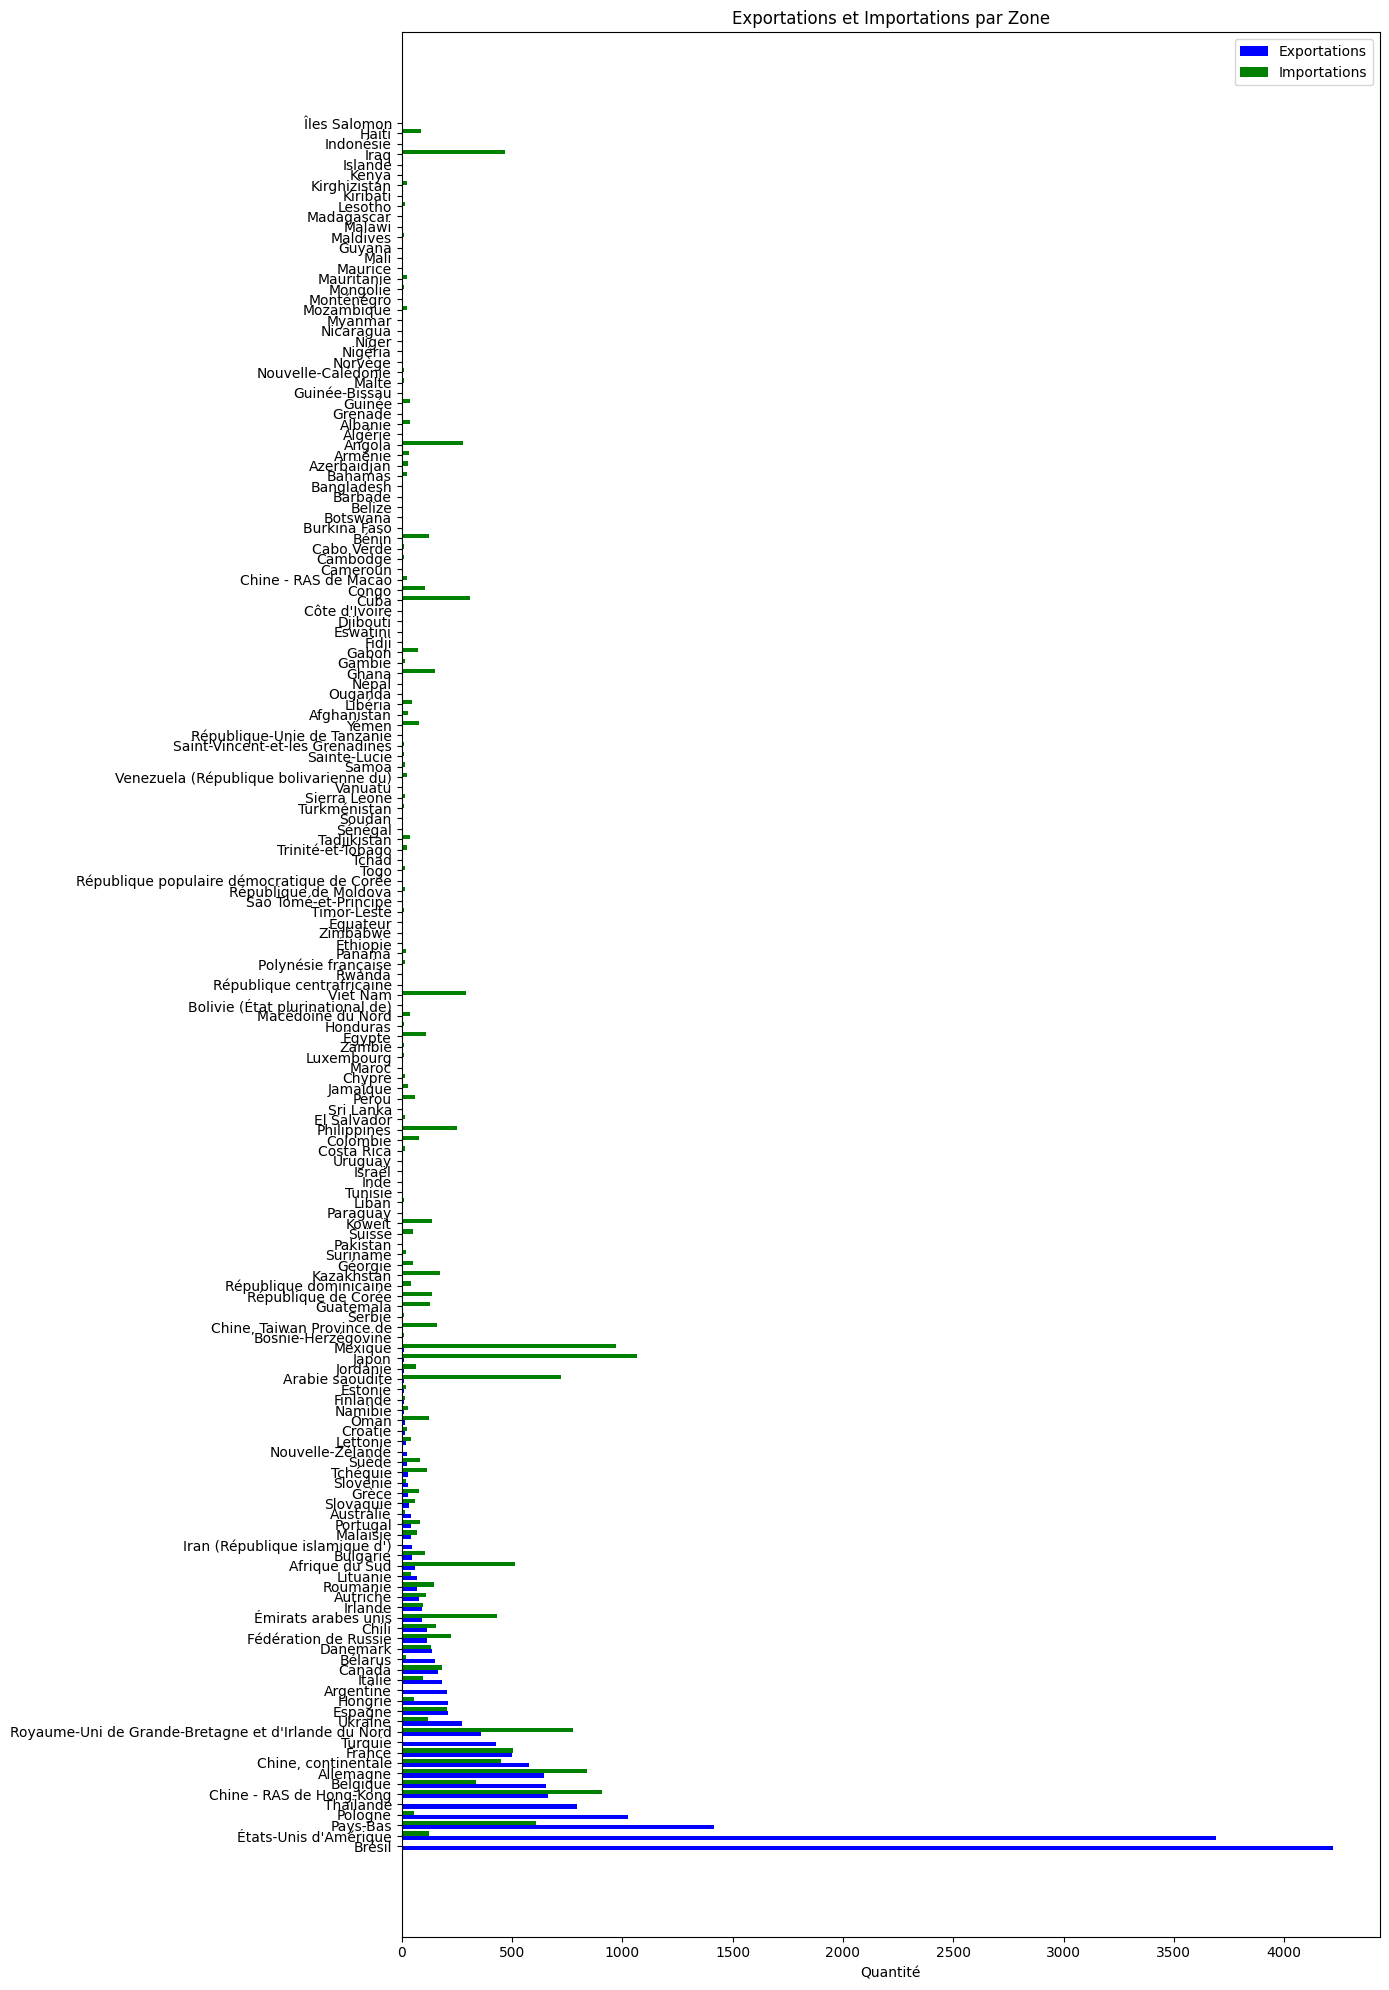

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filtered_df = dispo_alim

# Tri des données pour faciliter la visualisation
filtered_df.sort_values(by='Exportations - Quantité', ascending=False, inplace=True)

# Définir la largeur des barres
bar_width = 0.4

# Création du graphique à barres groupées
fig, ax = plt.subplots(figsize=(14, 20)) 

# Positions des barres pour l'axe y
pos = np.arange(len(filtered_df))

# Tracer les barres d'exportations
ax.barh(pos, filtered_df['Exportations - Quantité'], bar_width, align='center', label='Exportations', color='blue')

# Tracer les barres d'importations (décalées pour la visibilité)
ax.barh(pos + bar_width, filtered_df['Importations - Quantité'], bar_width, align='center', label='Importations', color='green')

# Étiquettes des pays sur l'axe y
ax.set_yticks(pos + bar_width / 2)
ax.set_yticklabels(filtered_df['Zone'])

# Réglages des étiquettes, titre et légende
ax.set_xlabel('Quantité')
ax.set_title('Exportations et Importations par Zone')
ax.legend()

# Ajustement de l'espacement entre les barres et les étiquettes
plt.subplots_adjust(left=0.2)  

# Affichage du graphique
plt.tight_layout()
plt.show()


<span style="color: #FFA500;">Nous observons que les pays les plus développés affichent des valeurs d'exportation et d'importation significativement plus élevées. Cependant, nous remarquons également que certaines zones moins développées présentent des taux d'importation non négligeable.</span>

In [30]:
# Afficher les valeurs des colonnes spécifiées pour toutes les zones
print(dispo_alim[['Zone', 'Exportations - Quantité', 'Importations - Quantité', 'Disponibilité intérieure', 'Production']])



                      Zone  Exportations - Quantité  Importations - Quantité  \
21                  Brésil                   4223.0                      3.0   
167  États-Unis d'Amérique                   3692.0                    123.0   
116               Pays-Bas                   1418.0                    608.0   
118                Pologne                   1025.0                     55.0   
149              Thaïlande                    796.0                      2.0   
..                     ...                      ...                      ...   
71                 Islande                      0.0                      2.0   
69                    Iraq                      0.0                    470.0   
67               Indonésie                      0.0                      1.0   
63                   Haïti                      0.0                     89.0   
169           Îles Salomon                      0.0                      6.0   

     Disponibilité intérieure  Producti

<span style="color: #FFA500;">Nous remarquons des valeurs d'exportation élevées pour des zones telles que le Brésil, les États-Unis d'Amérique et les Pays-Bas.</span>

In [31]:
zones_supprimer = ['Chine - RAS de Hong-Kong','Chine - RAS de Macao', 'Chine',
                   'Chine', 'Inde','Chine','Chine, continentale']


# Créer un filtre booléen pour les zones à supprimer
filtre_zone = dispo_alim['Zone'].isin(zones_supprimer)

# Supprimer les lignes correspondantes aux zones à supprimer
dispo_alim_filtre = dispo_alim[~filtre_zone]


<span style="color: #FFA500;">Nous excluons les zones où la population est élevée.</span>

In [32]:
display(dispo_alim_filtre)

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population
21,Brésil,9982.0,4223.0,3.0,14201.0,2017,207833823
167,États-Unis d'Amérique,18266.0,3692.0,123.0,21914.0,2017,325084756
116,Pays-Bas,372.0,1418.0,608.0,1100.0,2017,17021347
118,Pologne,1156.0,1025.0,55.0,2351.0,2017,37953180
149,Thaïlande,881.0,796.0,2.0,1676.0,2017,69209810
...,...,...,...,...,...,...,...
71,Islande,10.0,0.0,2.0,10.0,2017,334393
69,Iraq,566.0,0.0,470.0,96.0,2017,37552781
67,Indonésie,2323.0,0.0,1.0,2301.0,2017,264650963
63,Haïti,98.0,0.0,89.0,9.0,2017,10982366


In [33]:
dispo_alim_filtre['id_unique'] = np.arange(1, len(dispo_alim_filtre) + 1)

# Affichage pour vérification des premières lignes avec l'ID unique
print(dispo_alim_filtre[['Zone', 'id_unique']].head())

# Vérification de l'unicité de l'ID unique
if dispo_alim_filtre['id_unique'].is_unique:
    print("Les identifiants uniques ont été créés avec succès.")
else:
    print("Il y a des doublons dans les identifiants uniques.")

                      Zone  id_unique
21                  Brésil          1
167  États-Unis d'Amérique          2
116               Pays-Bas          3
118                Pologne          4
149              Thaïlande          5
Les identifiants uniques ont été créés avec succès.


C:\Users\eteiw\AppData\Local\Temp\ipykernel_17976\500776962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_alim_filtre['id_unique'] = np.arange(1, len(dispo_alim_filtre) + 1)


<span style="color: #FFA500;">Pour une meilleure lisibilité, nous créons une clé unique par zone.</span>

In [34]:
dispo_alim_filtre

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Année,population,id_unique
21,Brésil,9982.0,4223.0,3.0,14201.0,2017,207833823,1
167,États-Unis d'Amérique,18266.0,3692.0,123.0,21914.0,2017,325084756,2
116,Pays-Bas,372.0,1418.0,608.0,1100.0,2017,17021347,3
118,Pologne,1156.0,1025.0,55.0,2351.0,2017,37953180,4
149,Thaïlande,881.0,796.0,2.0,1676.0,2017,69209810,5
...,...,...,...,...,...,...,...,...
71,Islande,10.0,0.0,2.0,10.0,2017,334393,159
69,Iraq,566.0,0.0,470.0,96.0,2017,37552781,160
67,Indonésie,2323.0,0.0,1.0,2301.0,2017,264650963,161
63,Haïti,98.0,0.0,89.0,9.0,2017,10982366,162


In [35]:
# Exporter la DataFrame dispo_alim au format CSV
dispo_alim_filtre.to_csv('dispo_alim_filtre.csv', index=False)